In [23]:
#conda install pip

In [ ]:
#pip install imutils

In [ ]:
#conda install pytorch torchvision -c pytorch

In [ ]:
#conda install opencv

In [ ]:
#pip install opencv

In [ ]:
#conda install -c conda-forge opencv

In [ ]:
#pip install opencv-python

In [7]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imutils
from skimage import io, measure
from skimage.util import img_as_ubyte
from imutils import contours
import os
import cv2
import torch

In [8]:
def showimage(imgs):
    plt.imshow(imgs)
    plt.show()

In [9]:
center_file = {}

In [10]:
from imutils import contours
from skimage import measure
from matplotlib import pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

In [11]:
import xml.etree.ElementTree as ET

In [12]:
CNN_SHAPE = (64, 64)

In [7]:
for filename in os.listdir(r'path'):
    if filename.endswith('.tif'):
        img = io.imread(f'./path/{filename}') 
       # print(img.size)
        n_slices = img.shape[0]
        #print(img.shape[0])
        position_source = n_slices//2
        #our image is in sphere shape to retrieve center frame
        img[position_source,:,:].shape
        image = img_as_ubyte(img[position_source, :, :])
        
        #print(image.type)
        #print(img[position_source,:,:])
       # showimage(image)
        thresh = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
        thresh = cv2.threshold(thresh, 40, 255, cv2.THRESH_BINARY)[1]
       # showimage(thresh)
        #, the values below 40 convert to 0 and remaining to 255
        labels = measure.label(thresh, connectivity=None, background=0)
        #print(np.unique(labels)), connectivity is used to find the same pixels around neighbors
        mask = np.zeros(thresh.shape, dtype="uint8")
        for label in np.unique(labels):
            if label == 0:
                continue
            labelMask = np.zeros(thresh.shape, dtype="uint8")
            labelMask[labels == label] = 255
            #showimage(labelMask)
            #print(np.unique(mask), np.unique(labelMask))
            numPixels = cv2.countNonZero(labelMask)
            if numPixels > 6:
                mask = cv2.add(mask, labelMask)
                #showimage(mask)
                #print(np.unique(mask.copy()))
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        cnts = contours.sort_contours(cnts)[0]
        centers = []        
        for (i, c) in enumerate(cnts):
            ((cX, cY), radius) = cv2.minEnclosingCircle(c)
            #print(cX, cY, radius)
            centers.append((int(cX), int(cY)))
            cv2.circle(image, (int(cX), int(cY)), int(radius), (255, 0, 0), 2)
            #print(filename, centers)
        #showimage(w)
#             print(w.size)
#             print(w.shape)
            #plt.imshow(w, cmap='gray')
#print(len(w))
            
        center_file[f"{filename.split('_')[0]}_{filename.split('Fov')[1].split('_')[0]}"] = centers

In [8]:
center_file

{'11.18.21_3': [(3, 353),
  (35, 117),
  (81, 66),
  (83, 195),
  (181, 120),
  (213, 350),
  (221, 177),
  (254, 304),
  (319, 191),
  (340, 101),
  (357, 289),
  (365, 296),
  (373, 485),
  (384, 469),
  (389, 360),
  (423, 175),
  (482, 409),
  (490, 410)],
 '11.2.21_3': [(8, 1),
  (48, 230),
  (63, 103),
  (122, 94),
  (160, 319),
  (177, 168),
  (238, 295),
  (272, 445),
  (271, 161),
  (297, 217),
  (369, 383),
  (408, 381),
  (432, 282),
  (438, 366),
  (446, 459),
  (452, 313),
  (477, 183)],
 '11.23.21_2': [(29, 183),
  (34, 452),
  (91, 223),
  (153, 373),
  (172, 57),
  (218, 442),
  (259, 273),
  (330, 254),
  (350, 198),
  (401, 449),
  (409, 362),
  (410, 314),
  (435, 4),
  (439, 272),
  (487, 201),
  (490, 5)],
 '11.30.21_8': [(24, 460),
  (28, 8),
  (30, 45),
  (33, 193),
  (50, 33),
  (167, 128),
  (253, 354),
  (261, 203),
  (304, 390),
  (349, 45),
  (350, 207),
  (403, 347),
  (408, 20),
  (412, 3),
  (434, 130),
  (496, 487)]}

In [13]:
for filename in os.listdir('path'):
    if filename.endswith('.tif'):
        #i=0
        img = io.imread(f'./path/{filename}')
        n_slices = img.shape[0]
        position_source = n_slices//2
        img[position_source,:,:].shape
        image = img_as_ubyte(img[position_source, :, :])
        thresh = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
        thresh = cv2.threshold(thresh, 40, 255, cv2.THRESH_BINARY)[1]
        #showimage(thresh)
        labels = measure.label(thresh, connectivity=None, background=0)
        mask = np.zeros(thresh.shape, dtype="uint8")
        for label in np.unique(labels):
            if label == 0:
                continue
            labelMask = np.zeros(thresh.shape, dtype="uint8")
            labelMask[labels == label] = 255
            numPixels = cv2.countNonZero(labelMask)
            if numPixels > 6:
                mask = cv2.add(mask, labelMask)
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        cnts = contours.sort_contours(cnts)[0]
        centers = []
        for (i, c) in enumerate(cnts):
            ((cX, cY), radius) = cv2.minEnclosingCircle(c)
            centers.append((int(cX), int(cY)))
            cv2.circle(image, (int(cX), int(cY)), int(radius), (255, 0, 0), 2)
        center_file[f"{filename.split('_')[0]}_{filename.split('Fov')[1].split('_')[0]}"] = centers
        #for c in cnts:
#     # get the bounding rect
#             x, y, w, h = cv2.boundingRect(c) # to save the images
#             name='C:/Users/annem/OneDrive/Desktop/Wake Forest Cell Microscopy/counter/file_' + str(i) +  '.png'
#             cv2.imwrite(name, image[y:y+h,x:x+w])
#             #showimage(image[y:y+h,x:x+w])
#             # cv2.imwrite('img_{}.jpg'.format(i), image[y:y+h,x:x+w])
#             i += 1

        #print(cnts)
        
            #print(cX, cY)
            
            #showimage(image)
           # print(center_file)
            #print(filename.split('Fov')[1].split('_')[0])
        
        #print(np.unique(center_file))
        #cv2.imshow('image', image)
       

In [18]:
print(len(center_file))

6


In [19]:
#showimage(img)
center_file

{'1.11.22_3': [(101, 52), (297, 317), (327, 175)],
 '11.16.21_3': [(15, 441),
  (117, 103),
  (137, 223),
  (146, 170),
  (205, 196),
  (242, 253),
  (295, 20),
  (355, 342),
  (374, 233),
  (380, 27),
  (382, 68),
  (424, 57),
  (439, 388)],
 '11.18.21_3': [(1, 349),
  (40, 115),
  (86, 193),
  (86, 67),
  (187, 122),
  (215, 347),
  (226, 177),
  (258, 302),
  (325, 193),
  (344, 99),
  (369, 295),
  (392, 359),
  (427, 173),
  (492, 410)],
 '11.23.21_2': [(34, 191),
  (96, 232),
  (157, 381),
  (177, 65),
  (266, 281),
  (336, 263),
  (356, 208),
  (411, 371),
  (415, 323),
  (441, 13),
  (444, 281),
  (491, 211),
  (493, 12)],
 '11.30.21_8': [(30, 8),
  (32, 46),
  (35, 192),
  (52, 32),
  (168, 128),
  (254, 352),
  (262, 202),
  (304, 389),
  (350, 45),
  (352, 207),
  (403, 346),
  (410, 20),
  (413, 3),
  (436, 130)],
 '11.4.21_3': [(0, 296),
  (23, 6),
  (55, 338),
  (116, 393),
  (144, 145),
  (176, 7),
  (210, 357),
  (213, 115),
  (253, 220),
  (284, 299),
  (334, 319),
  (

In [12]:
#print(im)

In [10]:
import pandas as pd

In [12]:
k1 = list(center_file.keys())

In [13]:
df=pd.DataFrame(columns=['filename','center'])
i=0
for k in center_file.keys():
    df.at[i,'filename'] = k 
    df.at[i,'center'] = centers
    i+=1
    
print(df)

      filename                                             center
0   1.20.22_10  [(81, 101), (196, 409), (249, 101), (368, 360)...
1   1.20.22_11  [(81, 101), (196, 409), (249, 101), (368, 360)...
2   1.20.22_12  [(81, 101), (196, 409), (249, 101), (368, 360)...
3   1.20.22_13  [(81, 101), (196, 409), (249, 101), (368, 360)...
4    1.20.22_1  [(81, 101), (196, 409), (249, 101), (368, 360)...
5    1.20.22_3  [(81, 101), (196, 409), (249, 101), (368, 360)...
6    1.20.22_5  [(81, 101), (196, 409), (249, 101), (368, 360)...
7    1.20.22_7  [(81, 101), (196, 409), (249, 101), (368, 360)...
8    1.20.22_8  [(81, 101), (196, 409), (249, 101), (368, 360)...
9    1.20.22_9  [(81, 101), (196, 409), (249, 101), (368, 360)...
10   1.25.22_1  [(81, 101), (196, 409), (249, 101), (368, 360)...
11   1.25.22_2  [(81, 101), (196, 409), (249, 101), (368, 360)...
12   1.25.22_3  [(81, 101), (196, 409), (249, 101), (368, 360)...
13   1.25.22_4  [(81, 101), (196, 409), (249, 101), (368, 360)...
14   1.25.

In [16]:
df =pd.DataFrame(columns=['filename','type','number of cells or boundingboxes'])
i=0
for k in center_file.keys():
    df.at[i,'filename'] = k 
    df.at[i,'type'] = 'train'
    df.at[i,'number of cells or boundingboxes'] =  len(center_file[k])
    i+=1

In [48]:
df.to_csv(r'path\Tcenter.csv',index=False)

In [ ]:
pip install detecto

In [9]:
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import torch

In [10]:
custom_transforms = transforms.Compose([
transforms.ToPILImage(),
transforms.Resize(900),
transforms.ColorJitter(saturation=0.2),
transforms.ToTensor(),
utils.normalize_transform(),
])

In [5]:
#USE GPU to train
Train_dataset = core.Dataset('path/', transform=custom_transforms)
Test_dataset = core.Dataset('testpath/')
loader = core.DataLoader(Train_dataset, batch_size=2, shuffle=False)
model = core.Model(['spot']) 

C:\Users\Bharath\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Bharath\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [32]:
losses = model.fit(loader, Test_dataset, epochs=25, lr_step_size=5, learning_rate=0.001, verbose=True)

It looks like you're training your model on a CPU. Consider switching to a GPU; otherwise, this method can take hours upon hours or even days to finish. For more information, see https://detecto.readthedocs.io/en/latest/usage/quickstart.html#technical-requirements
Epoch 1 of 25
Begin iterating over training dataset


100%|██████████| 22/22 [03:56<00:00, 10.74s/it]


Begin iterating over validation dataset


100%|██████████| 22/22 [00:48<00:00,  2.22s/it]


Loss: 0.686735219576142
Epoch 2 of 25
Begin iterating over training dataset


100%|██████████| 22/22 [04:11<00:00, 11.42s/it]


Begin iterating over validation dataset


100%|██████████| 22/22 [00:48<00:00,  2.20s/it]


Loss: 0.46069489825855603
Epoch 3 of 25
Begin iterating over training dataset


100%|██████████| 22/22 [04:13<00:00, 11.50s/it]


Begin iterating over validation dataset


100%|██████████| 22/22 [00:54<00:00,  2.49s/it]


Loss: 0.3560178625312718
Epoch 4 of 25
Begin iterating over training dataset


100%|██████████| 22/22 [04:19<00:00, 11.79s/it]


Begin iterating over validation dataset


100%|██████████| 22/22 [00:46<00:00,  2.13s/it]


Loss: 0.37924359061501245
Epoch 5 of 25
Begin iterating over training dataset


100%|██████████| 22/22 [03:59<00:00, 10.89s/it]


Begin iterating over validation dataset


100%|██████████| 22/22 [00:47<00:00,  2.17s/it]


Loss: 0.3668049621311101
Epoch 6 of 25
Begin iterating over training dataset


100%|██████████| 22/22 [03:54<00:00, 10.67s/it]


Begin iterating over validation dataset


100%|██████████| 22/22 [00:48<00:00,  2.20s/it]


Loss: 0.3690671426328746
Epoch 7 of 25
Begin iterating over training dataset


100%|██████████| 22/22 [04:00<00:00, 10.94s/it]


Begin iterating over validation dataset


100%|██████████| 22/22 [00:48<00:00,  2.20s/it]


Loss: 0.33833482319658453
Epoch 8 of 25
Begin iterating over training dataset


100%|██████████| 22/22 [03:58<00:00, 10.85s/it]


Begin iterating over validation dataset


100%|██████████| 22/22 [00:48<00:00,  2.21s/it]


Loss: 0.3373506028543819
Epoch 9 of 25
Begin iterating over training dataset


 41%|████      | 9/22 [01:54<02:44, 12.67s/it]


KeyboardInterrupt: 

In [3]:
model.save('Tmodel_weight.pth')

NameError: name 'model' is not defined

In [11]:
from detecto.core import Model
model = Model.load('model2_weight.pth', classes=['spot'])

C:\Users\Bharath\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Bharath\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
import os
import math
def dist(x, y):
    # point a
    # distance b/w a and b
    return math.sqrt(((y[1]-x[1])**2) + ((y[0] - x[0])**2))

In [13]:
#img_boxesT = {}
img_boxes = {}
img_files = {}

In [14]:
def get_brightest_spot(img, box_BL, box_TR, verbose=False):
    img = img[ box_BL[1]: (box_BL[1] + (box_TR[1]-box_BL[1])),  box_BL[0] : (box_BL[0] + (box_TR[0]-box_BL[0]))]
    #thresh = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    thresh = cv2.threshold(thresh, 130, 255, cv2.THRESH_BINARY)[1]
    if verbose:
        showimage(thresh)
    labels = measure.label(thresh, connectivity=None, background=0)
    mask = np.zeros(thresh.shape, dtype="uint8")
    for label in np.unique(labels):
        if label == 0:
            continue
        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)
        if numPixels > 6:
            mask = cv2.add(mask, labelMask)
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = contours.sort_contours(cnts)[0]
    midpoint = (img.shape[0]//2, img.shape[1]//2)
    lowest = None
    for center in cnts:
        a, b = cv2.minEnclosingCircle(center)
        distance = dist(midpoint, (a[0], a[1]))
        if not lowest or distance < lowest[1]:
            lowest = ((box_BL[0]+a[0], box_BL[1]+a[1]), distance)
            #print(lowest)
    
    return lowest

In [16]:
for filename in os.listdir('path'):
      if filename.endswith(".png"):
        image = utils.read_image(os.path.join('path/', filename)) 
        img_files[filename] = image
        predictions = model.predict(image)
        labels, boxes, scores = predictions
        thresh=0.6
        filtered_indices=np.where(scores>thresh)
        filtered_scores=scores[filtered_indices]
        filtered_boxes=boxes[filtered_indices]
        num_list = filtered_indices[0].tolist()
        filtered_labels = [labels[i] for i in num_list]
        img_boxes[filename] = filtered_boxes
        #show_labeled_image(image, filtered_boxes, filtered_labels)
#         test_loss, test_acc = model.evaluate(image)
#         print('Test accuracy:', test_acc)

In [17]:
test_centers = {}
for filename in os.listdir('path'):
    if filename.endswith(".png"):
        image = cv2.imread(os.path.join('path', filename))
        print(image)
        #img_gray = cv2.cvtColor(image, 0)
        test_centers[filename] = []
        bndboxes = img_boxes[filename]
        nospp_centers = center_file[f"{filename.split('_')[0]}_{filename.split('Fov')[1].split('_')[0]}"]
        #img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #print(filename, nospp_centers)

        for box in bndboxes:
            box = tuple(box)
            xmin = int(box[0])
            xmax = int(box[2])
            ymin = int(box[1])
            ymax = int(box[3])                      
            predicted_center = (xmin + (xmax-xmin)//2, ymin + (ymax-ymin)//2)     
            corresponding_ct = None
            for ct in nospp_centers:
                if not corresponding_ct or dist(ct, predicted_center) < dist(corresponding_ct, predicted_center):
                    corresponding_ct = ct
                #print(filename, corresponding_ct)    
                #print(filename, predicted_center)
            cnt = []
            red=[255,0,0]
            blue=[0,0,255]
            iq=cv2.circle(image, corresponding_ct, 1, blue, 2)
            im=cv2.circle(iq, predicted_center, 1, red, 2)
            img = im[ ymin: (ymin + (ymax-ymin)),  xmin : (xmin + (xmax-xmin))]
            if abs(img.shape[1] - img.shape[0]) >=20:
                  continue
            img1 = cv2.resize(img, CNN_SHAPE, interpolation = cv2.INTER_AREA)
            cnt=[]
            cnt.append(img1)
            cnt.extend(corresponding_ct)
            cnt.extend(predicted_center)
            
            #cnt.append([(predicted_center[0]-corresponding_ct[0]),(predicted_center[1]-corresponding_ct[1])])
            test_centers[filename].append(cnt)
            #showimage(im)
            
            #for image1 in image:
                #for p in predicted_center:
                    #for c in corresponding_ct:
            #i=cv2.circle(image, nospp_centers, 1, red, -1)
            #print(corresponding_ct)
 #print(filename,nospp_centers, corresponding_ct, predicted_center)
            #print(filename, corresponding_ct)
           # i1=cv2.circle(i, predicted_center, 1, blue, )
         
#             iq=cv2.circle(image, corresponding_ct, 1, blue, 2)
#             i1=cv2.circle(iq, predicted_center, 1, red, 2)
#             img = i1[ ymin: (ymin + (ymax-ymin)),  xmin : (xmin + (xmax-xmin))]
#             if abs(img.shape[1] - img.shape[0]) >=20:
#                 continue
#             img = cv2.resize(img, CNN_SHAPE, interpolation = cv2.INTER_AREA)
            
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
            
    
           
            #cnt.append(img)
            
#             for idx, s_image in enumerate(image):
#                 cv_image = cv2.imread(s_image)
#                 cv_mark = cv_image.copy()  # ensure the source image unchanged
#                 mark_type = 'circle'
#             for coord in predicted_center:
#                 cv_mark = draw_mark(cv_mark, coord, mark_type)
#                 print(cv_mark)
                #cv2.imwrite(f'./mark_{mark_type}_{idx}.jpg', cv_mark)
            
            
               
            #cnt.extend(predicted_center)
           # cnt.append(predicted_center)
           #A cnt.append(corresponding_ct)

       # showimage(i1)
            #bts = get_brightest_spot(image, (xmin,ymin), (xmax, ymax))
            
           ## cnt.extend([(bts[0][0]-corresponding_ct[0]), (bts[0][1]-corresponding_ct[1])])
           # print(cnt)
            ##
            #cnt.append((bts[0][0], bts[0][1]))
            #lossbetween predicted cenetr and corresponding center
            #test_centers[filename].append(cnt)
#print(len(predicted_center))
            #print(iq.size)
    
            #showimage(iq)
      #A  print(predicted_center)       

[[[15 15 15]
  [15 15 15]
  [16 16 16]
  ...
  [18 18 18]
  [17 17 17]
  [18 18 18]]

 [[15 15 15]
  [15 15 15]
  [16 16 16]
  ...
  [18 18 18]
  [19 19 19]
  [18 18 18]]

 [[15 15 15]
  [16 16 16]
  [16 16 16]
  ...
  [18 18 18]
  [17 17 17]
  [19 19 19]]

 ...

 [[20 20 20]
  [20 20 20]
  [19 19 19]
  ...
  [19 19 19]
  [19 19 19]
  [19 19 19]]

 [[20 20 20]
  [20 20 20]
  [20 20 20]
  ...
  [19 19 19]
  [19 19 19]
  [19 19 19]]

 [[ 5  5  5]
  [ 5  5  5]
  [ 4  4  4]
  ...
  [ 5  5  5]
  [ 4  4  4]
  [ 5  5  5]]]
[[[12 12 12]
  [11 11 11]
  [12 12 12]
  ...
  [13 13 13]
  [14 14 14]
  [13 13 13]]

 [[12 12 12]
  [11 11 11]
  [12 12 12]
  ...
  [14 14 14]
  [14 14 14]
  [13 13 13]]

 [[11 11 11]
  [12 12 12]
  [12 12 12]
  ...
  [13 13 13]
  [14 14 14]
  [14 14 14]]

 ...

 [[15 15 15]
  [15 15 15]
  [14 14 14]
  ...
  [15 15 15]
  [13 13 13]
  [15 15 15]]

 [[15 15 15]
  [14 14 14]
  [14 14 14]
  ...
  [15 15 15]
  [14 14 14]
  [14 14 14]]

 [[ 4  4  4]
  [ 4  4  4]
  [ 4  4  4]
  .

In [59]:
#test_centers1={}
#for pointing predicted results 
for filename in os.listdir('C:/Users/Bharath/OneDrive/Desktop/Wake Forest Cell Microscopy/test'):
    if filename.endswith("tif_mid.png"):
        image = cv2.imread(os.path.join('C:/Users/Bharath/OneDrive/Desktop/Wake Forest Cell Microscopy/test', filename))
#         print(image.shape)
#         print(image.size)
#         img1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
#         print(img1.size)
#         print(img1.shape)
        test_centers[filename] = []
        bndboxes = img_boxes[filename]
        nospp_centers = center_file[f"{filename.split('_')[0]}_{filename.split('Fov')[1].split('_')[0]}"]
        #print(nospp_centers)
        #print(filename, nospp_centers)

        for box in bndboxes:
            box = tuple(box)
            xmin = int(box[0])
            xmax = int(box[2])
            ymin = int(box[1])
            ymax = int(box[3])
       
        
#             img = image[ ymin: (ymin + (ymax-ymin)),  xmin : (xmin + (xmax-xmin))]
#             if abs(img.shape[1] - img.shape[0]) >=20:
#                 continue
#             img = cv2.resize(img, CNN_SHAPE, interpolation = cv2.INTER_AREA)
#             img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)               
           
            predicted_center = (xmin + (xmax-xmin)//2, ymin + (ymax-ymin)//2)
            corresponding_ct = None
            for ct in nospp_centers:
                if not corresponding_ct or dist(ct, predicted_center) < dist(corresponding_ct, predicted_center):
                    corresponding_ct = ct
            cnt = []
            red=[255,0,0]
            blue=[0,0,255]   
            iq=cv2.circle(image, corresponding_ct, 1, blue, 2)
            i1=cv2.circle(iq, predicted_center, 1, red, 2)
            img = i1[ ymin: (ymin + (ymax-ymin)),  xmin : (xmin + (xmax-xmin))]
            if abs(img.shape[1] - img.shape[0]) >=20:
                continue
            img2 = cv2.resize(img, CNN_SHAPE, interpolation = cv2.INTER_AREA)
            cnt.append(img2)
            cnt.append([(predicted_center[0]-corresponding_ct[0]),(predicted_center[1]-corresponding_ct[1])])
            test_centers[filename].append(cnt)
            
           # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
            
    
           
          
                i=cv2.circle(img, corresponding_ct, 1, red, 2)
                #i1=cv2.circle(image, predicted_center, 1, red, 2)
                img = i[ ymin: (ymin + (ymax-ymin)),  xmin : (xmin + (xmax-xmin))]
                if abs(img.shape[1] - img.shape[0]) >=20:
                    continue
                img = cv2.resize(img, CNN_SHAPE, interpolation = cv2.INTER_AREA)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 



                cnt.append(img)

                for idx, s_image in enumerate(image):
                    cv_image = cv2.imread(s_image)
                    cv_mark = cv_image.copy()  # ensure the source image unchanged
                    mark_type = 'circle'
                for coord in predicted_center:
                    cv_mark = draw_mark(cv_mark, coord, mark_type)
                    print(cv_mark)
                    cv2.imwrite(f'./mark_{mark_type}_{idx}.jpg', cv_mark)



                cnt.extend(predicted_center)
                cnt.append(predicted_center)
                cnt.append(corresponding_ct)

                bts = get_brightest_spot(image, (xmin,ymin), (xmax, ymax))

               # cnt.extend([(bts[0][0]-corresponding_ct[0]), (bts[0][1]-corresponding_ct[1])])
                cnt.append([(predicted_center[0]-corresponding_ct[0]),(predicted_center[1]-corresponding_ct[1])])
             

KeyError: '1.25.22_SPP_Fov6_1_NDTiffStack.tif_mid.png'

In [28]:
#print(len(cnt))

In [61]:
test_centers

{'2.3.22_SPP_Fov1_1_NDTiffStack.tif_1.png': [[array([[[24, 24, 24],
           [25, 25, 25],
           [24, 24, 24],
           ...,
           [24, 24, 24],
           [24, 24, 24],
           [25, 25, 25]],
   
          [[23, 23, 23],
           [24, 24, 24],
           [25, 25, 25],
           ...,
           [25, 25, 25],
           [25, 25, 25],
           [25, 25, 25]],
   
          [[24, 24, 24],
           [25, 25, 25],
           [25, 25, 25],
           ...,
           [25, 25, 25],
           [25, 25, 25],
           [25, 25, 25]],
   
          ...,
   
          [[25, 25, 25],
           [25, 25, 25],
           [26, 26, 26],
           ...,
           [26, 26, 26],
           [26, 26, 26],
           [25, 25, 25]],
   
          [[25, 25, 25],
           [25, 25, 25],
           [25, 25, 25],
           ...,
           [26, 26, 26],
           [26, 26, 26],
           [26, 26, 26]],
   
          [[24, 24, 24],
           [25, 25, 25],
           [26, 26, 26],
        

In [21]:
import pandas as pd

In [18]:
k = list(test_centers.keys())

In [29]:
corresponding_ctX=[] 
corresponding_ctY=[]

predicted_centerX=[]
predicted_centerY=[]
im_map=[]
for k2 in k:
    for pt1 in test_centers[k2]:
        im_map.append(k2)
        corresponding_ctX.append(pt1[1])
        corresponding_ctY.append(pt1[2])
        predicted_centerX.append(pt1[3])
        predicted_centerY.append(pt1[4])
        

In [30]:
df5 = pd.DataFrame(columns=['filename','corresponding_x','corresponding_y','predicted_x','predicted_y'])
#df5['filename'] = pt1
#df5['cropfile'] = 0 
df5['filename'] = im_map
df5['corresponding_x'] = corresponding_ctX
df5['corresponding_y'] =corresponding_ctY
df5['predicted_x']= predicted_centerX
df5['predicted_y']= predicted_centerY

In [31]:
df5.to_csv("filepath/final.csv")

In [ ]:
k1 = list(test_centers.keys())

In [1]:
cropped_images=[]
test_center=[] 
cropped_images1=[]
test_center1=[]
im_map=[]
im_map=[]
for k2 in k1:
    for pt1 in test_centers[k2]:
        im_map.append(k2)
        cropped_images.append(pt1[0])
        test_center.append(pt1[1])

NameError: name 'k1' is not defined

In [ ]:
import pandas as pd
df5 = pd.DataFrame(columns=['filena','cropfile','testcenter_x','testcenter_y'])
df5['filename'] = im_map
df5['cropfile'] = 0 
df5['testcenter_x'] = [x[0] for x in test_center]
df5['testcenter_y'] = [x[1] for x in test_center]

In [60]:
df5.to_csv("filepath.csv")

In [46]:
test_centers

{'1.20.22_SPP_Fov10_1_NDTiffStack.tif_1.png': [[array([[[102, 102, 102],
           [102, 102, 102],
           [104, 104, 104],
           ...,
           [100, 100, 100],
           [ 99,  99,  99],
           [100, 100, 100]],
   
          [[103, 103, 103],
           [101, 101, 101],
           [100, 100, 100],
           ...,
           [ 98,  98,  98],
           [ 98,  98,  98],
           [ 99,  99,  99]],
   
          [[101, 101, 101],
           [100, 100, 100],
           [100, 100, 100],
           ...,
           [ 99,  99,  99],
           [ 98,  98,  98],
           [100, 100, 100]],
   
          ...,
   
          [[102, 102, 102],
           [102, 102, 102],
           [103, 103, 103],
           ...,
           [104, 104, 104],
           [ 99,  99,  99],
           [101, 101, 101]],
   
          [[104, 104, 104],
           [ 99,  99,  99],
           [103, 103, 103],
           ...,
           [104, 104, 104],
           [ 98,  98,  98],
           [101, 101, 10

In [48]:
import glob
from PIL import Image
no = 0
#for k2 in k1: 
for image in images:
        print(image)
        #img = Image.open(image)"C:\Users\Bharath\OneDrive\Desktop\cp"
        #imgResult = img.resize((800,800), resample = Image.BILINEAR).convert('RGB')
        name='C:/Users/Bharath/OneDrive/Desktop/cropped_files/file_' + str(no) +  '.png'
        cv2.imwrite(name, image)
        no += 1

[[[102 102 102]
  [102 102 102]
  [104 104 104]
  ...
  [100 100 100]
  [ 99  99  99]
  [100 100 100]]

 [[103 103 103]
  [101 101 101]
  [100 100 100]
  ...
  [ 98  98  98]
  [ 98  98  98]
  [ 99  99  99]]

 [[101 101 101]
  [100 100 100]
  [100 100 100]
  ...
  [ 99  99  99]
  [ 98  98  98]
  [100 100 100]]

 ...

 [[102 102 102]
  [102 102 102]
  [103 103 103]
  ...
  [104 104 104]
  [ 99  99  99]
  [101 101 101]]

 [[104 104 104]
  [ 99  99  99]
  [103 103 103]
  ...
  [104 104 104]
  [ 98  98  98]
  [101 101 101]]

 [[103 103 103]
  [ 99  99  99]
  [ 99  99  99]
  ...
  [102 102 102]
  [103 103 103]
  [ 98  98  98]]]
[[[ 93  93  93]
  [ 93  93  93]
  [ 94  94  94]
  ...
  [ 96  96  96]
  [ 97  97  97]
  [100 100 100]]

 [[ 91  91  91]
  [ 92  92  92]
  [ 96  96  96]
  ...
  [ 94  94  94]
  [ 96  96  96]
  [ 96  96  96]]

 [[ 94  94  94]
  [ 94  94  94]
  [ 93  93  93]
  ...
  [ 97  97  97]
  [ 96  96  96]
  [ 98  98  98]]

 ...

 [[ 96  96  96]
  [ 96  96  96]
  [ 94  94  94]
  ..

[[[109 109 109]
  [111 111 111]
  [110 110 110]
  ...
  [116 116 116]
  [113 113 113]
  [115 115 115]]

 [[109 109 109]
  [112 112 112]
  [111 111 111]
  ...
  [112 112 112]
  [111 111 111]
  [115 115 115]]

 [[112 112 112]
  [113 113 113]
  [111 111 111]
  ...
  [110 110 110]
  [109 109 109]
  [116 116 116]]

 ...

 [[114 114 114]
  [112 112 112]
  [113 113 113]
  ...
  [113 113 113]
  [114 114 114]
  [111 111 111]]

 [[110 110 110]
  [109 109 109]
  [110 110 110]
  ...
  [111 111 111]
  [113 113 113]
  [116 116 116]]

 [[114 114 114]
  [108 108 108]
  [112 112 112]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]]
[[[113 113 113]
  [115 115 115]
  [112 112 112]
  ...
  [114 114 114]
  [114 114 114]
  [114 114 114]]

 [[115 115 115]
  [112 112 112]
  [113 113 113]
  ...
  [116 116 116]
  [116 116 116]
  [115 115 115]]

 [[118 118 118]
  [115 115 115]
  [113 113 113]
  ...
  [116 116 116]
  [114 114 114]
  [114 114 114]]

 ...

 [[114 114 114]
  [116 116 116]
  [120 120 120]
  ..

In [ ]:
ipyplot.plot_images(img, im_map, predicted_center)

In [ ]:
test_centers

In [ ]:
len(test_centers)

In [ ]:
k1 = list(test_centers.keys())

In [ ]:
cropped_images=[]
im_map=[]
d1=[] 
d2=[]
for k2 in k1:
    for pt1 in test_centers[k2]:
        im_map.append(k2)
        cropped_images.append(pt1[0])
        d1.append(pt1[1])
        d2.append(pt1[2])
        #i=cv2.circle(cropped_images, d1, 1, red, 5)
                          

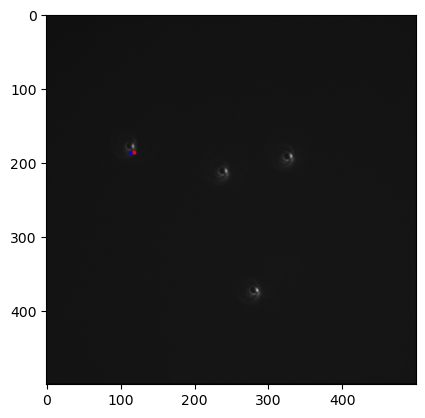

In [80]:
import cv2
image=cv2.imread(r"imagepath")
corresponding_ct=[115, 188]
predicted_center=[119,187]
#p=[215,345]
red=[255,0,0]
blue=[0,0,255]
#g=[0,255,0]
iq=cv2.circle(image, corresponding_ct, 1, blue, 2)
i1=cv2.circle(iq, predicted_center, 1, red, 2)
#iw=cv2.circle(i1, p, 1, g, 2)
# name='C:/Users/Bharath/OneDrive/Desktop/Investigating Chromatin/Source Codes/CNN/testeddataset'
# cv2.imwrite(name, i1)
showimage(i1)

In [ ]:
-----------------------------------

In [ ]:
showimage(cropped_images[97])

In [ ]:
import ipyplot

#labels = ['label1', 'label2', 'label3']
ipyplot.plot_images( cropped_images, im_map, predicted_center)
len(cropped_images)

In [ ]:
pip install ipyplot

In [ ]:
-----------------------------------------------------------------
------------------------
----------
----
-